# Assignment is below at the end

- https://scikit-learn.org/stable/modules/tree.html
- https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html
- https://scikit-learn.org/stable/modules/generated/sklearn.tree.plot_tree.html

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (20, 6)
plt.rcParams['font.size'] = 14
import pandas as pd

In [215]:
df = pd.read_csv('adult.data', index_col=False)

In [5]:
golden = pd.read_csv('adult.test', index_col=False)

In [6]:
golden.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K.
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K.
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K.


In [7]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [8]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'salary'],
      dtype='object')

In [9]:
from sklearn import preprocessing

In [20]:
import sklearn
print(sklearn.__version__)

1.0.2


In [18]:
!pip install --upgrade scikit-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.1/9.1 MB 8.1 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 298.0/298.0 kB 11.3 MB/s eta 0:00:00
  Attempting uninstall: joblib
    Found existing installation: joblib 1.1.0
    Uninstalling joblib-1.1.0:
      Successfully uninstalled joblib-1.1.0
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.0.2
    Uninstalling scikit-learn-1.0.2:
      Successfully uninstalled scikit-learn-1.0.2


In [1]:
import sklearn
print(sklearn.__version__)

1.2.1


In [85]:
# Columns we want to transform
transform_columns = ['sex']

#Columns we can't use because non-numerical
non_num_columns = ['workclass', 'education', 'marital-status', 
                     'occupation', 'relationship', 'race', 'sex', 
                     'native-country']

In [86]:
transform_columns, non_num_columns

(['sex'],
 ['workclass',
  'education',
  'marital-status',
  'occupation',
  'relationship',
  'race',
  'sex',
  'native-country'])

## First let's try using `pandas.get_dummies()` to transform columns

In [87]:
dummies = pd.get_dummies(df[transform_columns])
dummies

,sex_ Female,sex_ Male
0,0,1
1,0,1
2,0,1
3,0,1
4,1,0
...,...,...
32556,1,0
32557,0,1
32558,1,0
32559,0,1


In [88]:
dummies.shape

(32561, 2)

## sklearn has a similar process for OneHot Encoding features

In [89]:
onehot = preprocessing.OneHotEncoder(handle_unknown="infrequent_if_exist", sparse=False)
onehot.fit(df[transform_columns])

/opt/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


OneHotEncoder(handle_unknown='infrequent_if_exist', sparse=False,
              sparse_output=False)

In [90]:
onehot.categories_

[array([' Female', ' Male'], dtype=object)]

In [91]:
sex = onehot.transform(df[transform_columns])
sex

array([[0., 1.],
       [0., 1.],
       [0., 1.],
       ...,
       [1., 0.],
       [0., 1.],
       [1., 0.]])

In [92]:
sex.shape

(32561, 2)

## In addition to OneHot encoding there is Ordinal Encoding 

In [93]:
enc = preprocessing.OrdinalEncoder()
enc.fit(df[["salary"]])
salary = enc.transform(df[["salary"]])
salary

array([[0.],
       [0.],
       [0.],
       ...,
       [0.],
       [0.],
       [1.]])

In [94]:
enc.categories_[0]

array([' <=50K', ' >50K'], dtype=object)

In [95]:
x = df.copy()

# transformed = pd.get_dummies(df[transform_columns])


onehot = preprocessing.OneHotEncoder(handle_unknown="infrequent_if_exist", sparse=False).fit(df[transform_columns])

enc = preprocessing.OrdinalEncoder()

enc.fit(df[["salary"]])


transformed = onehot.transform(df[transform_columns])
new_cols = list(onehot.categories_[0].flatten())
df_trans = pd.DataFrame(transformed, columns=new_cols)


x = pd.concat(
    [
        x.drop(non_num_columns, axis=1), 
        df_trans
    ], 
    axis=1,)


x["salary"] = enc.transform(df[["salary"]])

/opt/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [246]:
df_trans

,Female,Male
0,0.0,1.0
1,0.0,1.0
2,0.0,1.0
3,0.0,1.0
4,1.0,0.0
...,...,...
16276,1.0,0.0
16277,0.0,1.0
16278,0.0,1.0
16279,0.0,1.0


In [256]:
enc.fit(df[["salary"]])

OrdinalEncoder()

In [240]:
onehot.transform(df[transform_columns])

array([[0., 1.],
       [0., 1.],
       [0., 1.],
       ...,
       [1., 0.],
       [0., 1.],
       [1., 0.]])

In [96]:
x.head()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,salary,Female,Male
0,39,77516,13,2174,0,40,0.0,0.0,1.0
1,50,83311,13,0,0,13,0.0,0.0,1.0
2,38,215646,9,0,0,40,0.0,0.0,1.0
3,53,234721,7,0,0,40,0.0,0.0,1.0
4,28,338409,13,0,0,40,0.0,1.0,0.0


In [97]:
xt = golden.copy()

transformed = onehot.transform(xt[transform_columns])
new_cols = list(onehot.categories_[0].flatten())
df_trans = pd.DataFrame(transformed, columns=new_cols)

xt = pd.concat(
    [
        xt.drop(non_num_columns, axis=1), 
        df_trans
    ], 
    axis=1,)

xt["salary"] = enc.fit_transform(golden[["salary"]])

In [98]:
list(xt)

['age',
 'fnlwgt',
 'education-num',
 'capital-gain',
 'capital-loss',
 'hours-per-week',
 'salary',
 ' Female',
 ' Male']

In [99]:
xt.salary.value_counts()

0.0    12435
1.0     3846
Name: salary, dtype: int64

In [100]:
xt.salary, x.salary

(0        0.0
 1        0.0
 2        1.0
 3        1.0
 4        0.0
         ... 
 16276    0.0
 16277    0.0
 16278    0.0
 16279    0.0
 16280    1.0
 Name: salary, Length: 16281, dtype: float64,
 0        0.0
 1        0.0
 2        0.0
 3        0.0
 4        0.0
         ... 
 32556    0.0
 32557    1.0
 32558    0.0
 32559    0.0
 32560    1.0
 Name: salary, Length: 32561, dtype: float64)

In [101]:
enc.categories_

[array([' <=50K.', ' >50K.'], dtype=object)]

In [102]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

#### Choose the model of your preference: DecisionTree or RandomForest

In [129]:
model = RandomForestClassifier(criterion='entropy')

In [137]:
model = DecisionTreeClassifier(criterion='entropy', max_depth=None)

In [130]:
model.fit(x.drop(['fnlwgt','salary'], axis=1), x.salary)

RandomForestClassifier(criterion='entropy')

In [119]:
model.tree_.node_count

8341

In [120]:
# Tree
list(zip(x.drop(['fnlwgt','salary'], axis=1).columns, model.feature_importances_))

[('age', 0.32391467900665477),
 ('education-num', 0.16048851806738418),
 ('capital-gain', 0.22784598464777944),
 ('capital-loss', 0.07827183570519927),
 ('hours-per-week', 0.15389326908322057),
 (' Female', 0.05439417820662001),
 (' Male', 0.0011915352831417538)]

In [131]:
# Forest
list(zip(x.drop(['fnlwgt','salary'], axis=1).columns, model.feature_importances_))

[('age', 0.3418366383367088),
 ('education-num', 0.16987852836589729),
 ('capital-gain', 0.18299948424191378),
 ('capital-loss', 0.07002533755900361),
 ('hours-per-week', 0.18125529252257955),
 (' Female', 0.0293043435748306),
 (' Male', 0.02470037539906628)]

In [121]:
x.drop(['fnlwgt','salary'], axis=1).head()

,age,education-num,capital-gain,capital-loss,hours-per-week,Female,Male
0,39,13,2174,0,40,0.0,1.0
1,50,13,0,0,13,0.0,1.0
2,38,9,0,0,40,0.0,1.0
3,53,7,0,0,40,0.0,1.0
4,28,13,0,0,40,1.0,0.0


In [122]:
x.columns, xt.columns

(Index(['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss',
        'hours-per-week', 'salary', ' Female', ' Male'],
       dtype='object'),
 Index(['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss',
        'hours-per-week', 'salary', ' Female', ' Male'],
       dtype='object'))

In [123]:
set(x.columns) - set(xt.columns)

set()

In [124]:
list(x.drop('salary', axis=1).columns)

['age',
 'fnlwgt',
 'education-num',
 'capital-gain',
 'capital-loss',
 'hours-per-week',
 ' Female',
 ' Male']

In [132]:
predictions = model.predict(xt.drop(['fnlwgt','salary'], axis=1))
predictionsx = model.predict(x.drop(['fnlwgt','salary'], axis=1))

In [133]:
predictions, predictionsx

(array([0., 0., 0., ..., 1., 1., 0.]), array([0., 0., 0., ..., 0., 0., 1.]))

In [127]:
from sklearn.metrics import (
    accuracy_score, 
    classification_report, 
    confusion_matrix, auc, roc_curve
)

In [128]:
# tree
accuracy_score(xt.salary, predictions)

0.8207112585222038

In [134]:
# forest
accuracy_score(xt.salary, predictions)

0.8263620170751182

In [114]:
confusion_matrix(xt.salary, predictions)

array([[11508,   927],
       [ 1868,  1978]])

In [115]:
# tree
print(classification_report(xt.salary, predictions))

              precision    recall  f1-score   support

         0.0       0.86      0.93      0.89     12435
         1.0       0.68      0.51      0.59      3846

    accuracy                           0.83     16281
   macro avg       0.77      0.72      0.74     16281
weighted avg       0.82      0.83      0.82     16281



In [135]:
# forest
print(classification_report(xt.salary, predictions))

              precision    recall  f1-score   support

         0.0       0.86      0.92      0.89     12435
         1.0       0.67      0.51      0.58      3846

    accuracy                           0.83     16281
   macro avg       0.77      0.72      0.74     16281
weighted avg       0.82      0.83      0.82     16281



In [138]:
# tree
accuracy_score(x.salary, predictionsx)

0.8955806025613464

In [136]:
# forest
accuracy_score(x.salary, predictionsx)

0.8955806025613464

In [49]:
confusion_matrix(x.salary, predictionsx)

array([[24097,   623],
       [ 2777,  5064]])

In [50]:
# tree
print(classification_report(x.salary, predictionsx))

              precision    recall  f1-score   support

         0.0       0.90      0.97      0.93     24720
         1.0       0.89      0.65      0.75      7841

    accuracy                           0.90     32561
   macro avg       0.89      0.81      0.84     32561
weighted avg       0.90      0.90      0.89     32561



In [58]:
# forest
print(classification_report(x.salary, predictionsx))

              precision    recall  f1-score   support

         0.0       0.91      0.96      0.93     24720
         1.0       0.85      0.68      0.76      7841

    accuracy                           0.90     32561
   macro avg       0.88      0.82      0.85     32561
weighted avg       0.89      0.90      0.89     32561



# For the following use the above `adult` dataset. 

# 1. Show the RandomForest outperforms the DecisionTree for a fixed `max_depth` by training using the train set and calculate `precision`, `recall`, `f1`, `confusion matrix` on golden-test set. Start with only numerical features/columns. (age, education-num, capital-gain, capital-loss, hours-per-week) 

In [178]:
model = DecisionTreeClassifier(criterion='entropy', max_depth=2)

In [179]:
model.fit(x.drop(['fnlwgt','salary'], axis=1), x.salary)

DecisionTreeClassifier(criterion='entropy', max_depth=2)

In [180]:
predictions = model.predict(xt.drop(['fnlwgt','salary'], axis=1))
predictionsx = model.predict(x.drop(['fnlwgt','salary'], axis=1))

In [181]:
# tree max_depth 2
accuracy_score(xt.salary, predictions)

0.8030833486886555

In [182]:
confusion_matrix(xt.salary, predictions)

array([[12428,     7],
       [ 3199,   647]])

In [183]:
# tree
print(classification_report(x.salary, predictionsx))

              precision    recall  f1-score   support

         0.0       0.79      1.00      0.88     24720
         1.0       0.99      0.18      0.30      7841

    accuracy                           0.80     32561
   macro avg       0.89      0.59      0.59     32561
weighted avg       0.84      0.80      0.74     32561



In [184]:
model = DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [185]:
model.fit(x.drop(['fnlwgt','salary'], axis=1), x.salary)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [186]:
predictions = model.predict(xt.drop(['fnlwgt','salary'], axis=1))
predictionsx = model.predict(x.drop(['fnlwgt','salary'], axis=1))

In [187]:
# tree max_depth 4
accuracy_score(xt.salary, predictions)

0.8192985688839752

In [188]:
confusion_matrix(xt.salary, predictions)

array([[11467,   968],
       [ 1974,  1872]])

In [189]:
# tree
print(classification_report(x.salary, predictionsx))

              precision    recall  f1-score   support

         0.0       0.85      0.92      0.89     24720
         1.0       0.67      0.50      0.57      7841

    accuracy                           0.82     32561
   macro avg       0.76      0.71      0.73     32561
weighted avg       0.81      0.82      0.81     32561



[Text(0.5288461538461539, 0.9, 'x[2] <= 7073.5\nentropy = 0.796\nsamples = 32561\nvalue = [24720, 7841]'),
 Text(0.3076923076923077, 0.7, 'x[0] <= 27.5\nentropy = 0.736\nsamples = 31162\nvalue = [24700, 6462]'),
 Text(0.15384615384615385, 0.5, 'x[0] <= 23.5\nentropy = 0.181\nsamples = 7987\nvalue = [7768, 219]'),
 Text(0.07692307692307693, 0.3, 'x[3] <= 2218.0\nentropy = 0.039\nsamples = 4758\nvalue = [4738, 20]'),
 Text(0.038461538461538464, 0.1, 'entropy = 0.033\nsamples = 4750\nvalue = [4734, 16]'),
 Text(0.11538461538461539, 0.1, 'entropy = 1.0\nsamples = 8\nvalue = [4, 4]'),
 Text(0.23076923076923078, 0.3, 'x[4] <= 41.5\nentropy = 0.334\nsamples = 3229\nvalue = [3030, 199]'),
 Text(0.19230769230769232, 0.1, 'entropy = 0.25\nsamples = 2424\nvalue = [2323, 101]'),
 Text(0.2692307692307692, 0.1, 'entropy = 0.534\nsamples = 805\nvalue = [707, 98]'),
 Text(0.46153846153846156, 0.5, 'x[1] <= 12.5\nentropy = 0.841\nsamples = 23175\nvalue = [16932, 6243]'),
 Text(0.38461538461538464, 0.3,

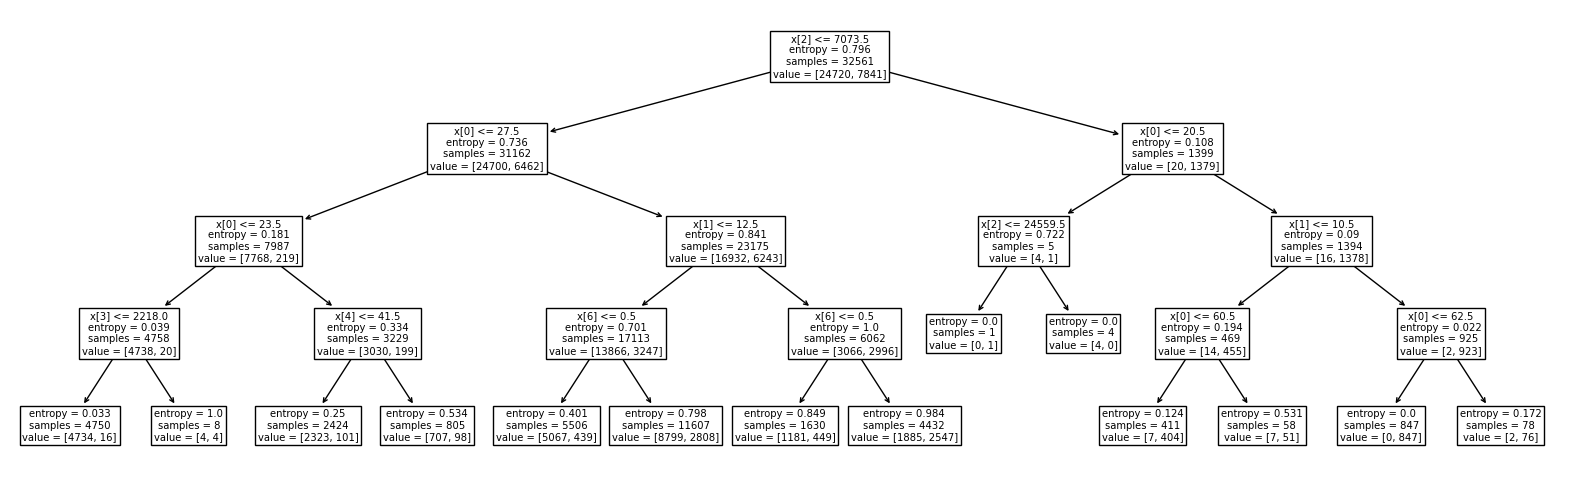

In [190]:
from sklearn import tree
tree.plot_tree(model)

In [191]:
model = RandomForestClassifier(criterion='entropy')

In [192]:
model.fit(x.drop(['fnlwgt','salary'], axis=1), x.salary)

RandomForestClassifier(criterion='entropy')

In [193]:
predictions = model.predict(xt.drop(['fnlwgt','salary'], axis=1))
predictionsx = model.predict(x.drop(['fnlwgt','salary'], axis=1))

In [194]:
# random forest
accuracy_score(xt.salary, predictions)

0.8282046557336773

In [195]:
confusion_matrix(xt.salary, predictions)

array([[11499,   936],
       [ 1861,  1985]])

In [196]:
# random forest
print(classification_report(x.salary, predictionsx))

              precision    recall  f1-score   support

         0.0       0.90      0.97      0.93     24720
         1.0       0.86      0.67      0.76      7841

    accuracy                           0.90     32561
   macro avg       0.88      0.82      0.85     32561
weighted avg       0.89      0.90      0.89     32561



With a max depth of 4 for decision tree, the random forest has a higher precision, recall and f1-score. 

# 2. Use a RandomForest or DecisionTree and the `adult` dataset, systematically add new columns, one by one, that are non-numerical but converted using the feature-extraction techniques we learned. Using the golden-test set show [`precision`, `recall`, `f1`, `confusion matrix`] for each additional feature added.

In [351]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [352]:
#breakout education parameters
dummy = pd.get_dummies(df['education'])
dummy.shape

(32561, 16)

In [353]:
enc = preprocessing.OrdinalEncoder()
enc.fit(df[["education"]])

OrdinalEncoder()

In [354]:
enc.categories_

[array([' 10th', ' 11th', ' 12th', ' 1st-4th', ' 5th-6th', ' 7th-8th',
        ' 9th', ' Assoc-acdm', ' Assoc-voc', ' Bachelors', ' Doctorate',
        ' HS-grad', ' Masters', ' Preschool', ' Prof-school',
        ' Some-college'], dtype=object)]

In [355]:
x2 = df.copy()

x2 = pd.concat([x2.drop(non_num_columns, axis=1)], axis=1) 
#               pd.get_dummies(df['education'])], axis=1,)

x2["education"] = enc.fit_transform(df[["education"]])
x2.head()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,salary,education
0,39,77516,13,2174,0,40,<=50K,9.0
1,50,83311,13,0,0,13,<=50K,9.0
2,38,215646,9,0,0,40,<=50K,11.0
3,53,234721,7,0,0,40,<=50K,1.0
4,28,338409,13,0,0,40,<=50K,9.0


In [356]:
enc.fit(df[["salary"]])
enc.categories_

[array([' <=50K', ' >50K'], dtype=object)]

In [357]:
x2["salary"] = enc.fit_transform(df[["salary"]])

In [358]:
x2 = x2.dropna()
x2.head()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,salary,education
0,39,77516,13,2174,0,40,0.0,9.0
1,50,83311,13,0,0,13,0.0,9.0
2,38,215646,9,0,0,40,0.0,11.0
3,53,234721,7,0,0,40,0.0,1.0
4,28,338409,13,0,0,40,0.0,9.0


In [359]:
enc.fit(golden[["education"]])
enc.categories_

[array([' 10th', ' 11th', ' 12th', ' 1st-4th', ' 5th-6th', ' 7th-8th',
        ' 9th', ' Assoc-acdm', ' Assoc-voc', ' Bachelors', ' Doctorate',
        ' HS-grad', ' Masters', ' Preschool', ' Prof-school',
        ' Some-college'], dtype=object)]

In [360]:
xt2 = golden.copy()

xt2 = pd.concat([xt2.drop(non_num_columns, axis=1)], axis=1,)

xt2["education"] = enc.transform(golden[["education"]])
xt2.head()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,salary,education
0,25,226802,7,0,0,40,<=50K.,1.0
1,38,89814,9,0,0,50,<=50K.,11.0
2,28,336951,12,0,0,40,>50K.,7.0
3,44,160323,10,7688,0,40,>50K.,15.0
4,18,103497,10,0,0,30,<=50K.,15.0


In [361]:
enc.fit(golden[["salary"]])

xt2["salary"] = enc.transform(golden[["salary"]])

xt2 = xt2.dropna()

In [362]:
xt2.head()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,salary,education
0,25,226802,7,0,0,40,0.0,1.0
1,38,89814,9,0,0,50,0.0,11.0
2,28,336951,12,0,0,40,1.0,7.0
3,44,160323,10,7688,0,40,1.0,15.0
4,18,103497,10,0,0,30,0.0,15.0


In [363]:
model = RandomForestClassifier(criterion='entropy')

In [364]:
model.fit(x2.drop(['fnlwgt','salary'], axis=1), x.salary)

RandomForestClassifier(criterion='entropy')

In [365]:
x2.drop(['fnlwgt','salary'], axis=1)

,age,education-num,capital-gain,capital-loss,hours-per-week,education
0,39,13,2174,0,40,9.0
1,50,13,0,0,13,9.0
2,38,9,0,0,40,11.0
3,53,7,0,0,40,1.0
4,28,13,0,0,40,9.0
...,...,...,...,...,...,...
32556,27,12,0,0,38,7.0
32557,40,9,0,0,40,11.0
32558,58,9,0,0,40,11.0
32559,22,9,0,0,20,11.0


In [366]:
predictions2 = model.predict(xt2.drop(['fnlwgt','salary'], axis=1))
predictionsx2 = model.predict(x2.drop(['fnlwgt','salary'], axis=1))

In [367]:
# random forest w/ education
accuracy_score(xt2.salary, predictions2)

0.8221853694490511

In [368]:
confusion_matrix(xt2.salary, predictions2)

array([[11550,   885],
       [ 2010,  1836]])

In [369]:
# random forest w/ education
print(classification_report(x2.salary, predictionsx2))

              precision    recall  f1-score   support

         0.0       0.89      0.97      0.93     24720
         1.0       0.86      0.62      0.72      7841

    accuracy                           0.88     32561
   macro avg       0.88      0.79      0.82     32561
weighted avg       0.88      0.88      0.88     32561



In [370]:
#breakout occupation parameters
dummy = pd.get_dummies(df['occupation'])
dummy.shape

(32561, 15)

In [371]:
enc.fit(df[["occupation"]])
enc.categories_

[array([' ?', ' Adm-clerical', ' Armed-Forces', ' Craft-repair',
        ' Exec-managerial', ' Farming-fishing', ' Handlers-cleaners',
        ' Machine-op-inspct', ' Other-service', ' Priv-house-serv',
        ' Prof-specialty', ' Protective-serv', ' Sales', ' Tech-support',
        ' Transport-moving'], dtype=object)]

In [372]:
x2 = df.copy()

x2 = pd.concat([x2.drop(non_num_columns, axis=1)], axis=1) 
x2["occupation"] = enc.fit_transform(df[["occupation"]])
x2["education"] = enc.fit_transform(df[["education"]])
x2["salary"] = enc.fit_transform(df[["salary"]])
x2.head()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,salary,occupation,education
0,39,77516,13,2174,0,40,0.0,1.0,9.0
1,50,83311,13,0,0,13,0.0,4.0,9.0
2,38,215646,9,0,0,40,0.0,6.0,11.0
3,53,234721,7,0,0,40,0.0,6.0,1.0
4,28,338409,13,0,0,40,0.0,10.0,9.0


In [373]:
enc.fit(golden[["occupation"]])
enc.categories_

[array([' ?', ' Adm-clerical', ' Armed-Forces', ' Craft-repair',
        ' Exec-managerial', ' Farming-fishing', ' Handlers-cleaners',
        ' Machine-op-inspct', ' Other-service', ' Priv-house-serv',
        ' Prof-specialty', ' Protective-serv', ' Sales', ' Tech-support',
        ' Transport-moving'], dtype=object)]

In [375]:
xt2 = golden.copy()

xt2 = pd.concat([xt2.drop(non_num_columns, axis=1)], axis=1) 
xt2["occupation"] = enc.transform(golden[["occupation"]])
enc.fit(golden[["education"]])
xt2["education"] = enc.transform(golden[["education"]])
enc.fit(golden[["salary"]])
xt2["salary"] = enc.transform(golden[["salary"]])
xt2.head()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,salary,occupation,education
0,25,226802,7,0,0,40,0.0,7.0,1.0
1,38,89814,9,0,0,50,0.0,5.0,11.0
2,28,336951,12,0,0,40,1.0,11.0,7.0
3,44,160323,10,7688,0,40,1.0,7.0,15.0
4,18,103497,10,0,0,30,0.0,0.0,15.0


In [376]:
xt2 = xt2.dropna()

In [377]:
model = RandomForestClassifier(criterion='entropy')
model.fit(x2.drop(['fnlwgt','salary'], axis=1), x.salary)

RandomForestClassifier(criterion='entropy')

In [378]:
predictions2 = model.predict(xt2.drop(['fnlwgt','salary'], axis=1))
predictionsx2 = model.predict(x2.drop(['fnlwgt','salary'], axis=1))

In [379]:
# random forest w/ education & occupation
accuracy_score(xt2.salary, predictions2)

0.8141391806400098

In [380]:
confusion_matrix(xt2.salary, predictions2)

array([[11298,  1137],
       [ 1889,  1957]])

In [381]:
# random forest w/ education & occupation
print(classification_report(x2.salary, predictionsx2))

              precision    recall  f1-score   support

         0.0       0.93      0.98      0.95     24720
         1.0       0.91      0.76      0.83      7841

    accuracy                           0.92     32561
   macro avg       0.92      0.87      0.89     32561
weighted avg       0.92      0.92      0.92     32561



Compared the above report to the previous outputs:
Just salary:

              precision    recall  f1-score   support

         0.0       0.90      0.97      0.93     24720
         1.0       0.86      0.67      0.76      7841
Addition of education ordinal:

              precision    recall  f1-score   support

         0.0       0.89      0.97      0.93     24720
         1.0       0.86      0.62      0.72      7841